# Prolog

In [156]:
!pip install sklego

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.model_selection import train_test_split
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
# model regression
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns



In [158]:
pd.set_option('display.max_columns', None)

# EDA

In [159]:
url = "https://github.com/rtleong/CSM148_DoorDash_Project_Fall25/raw/main/historical_data.csv"

df = pd.read_csv(url)
df.sample(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
143463,2.0,2015-01-30 04:52:11,2015-01-30 05:30:12,940,indian,1.0,5,3850,5,300,1050,52.0,40.0,41.0,446,739.0
135761,4.0,2015-02-01 01:07:40,2015-02-01 01:41:07,801,mexican,1.0,2,1828,2,529,1229,12.0,5.0,4.0,446,303.0
185244,5.0,2015-02-01 00:19:05,2015-02-01 00:46:58,319,dessert,1.0,3,1407,3,225,787,11.0,7.0,7.0,446,630.0
106671,4.0,2015-02-17 20:37:04,2015-02-17 21:08:12,6717,dessert,5.0,1,1295,1,1295,1295,40.0,40.0,38.0,251,453.0
35150,1.0,2015-02-03 21:21:41,2015-02-03 22:22:32,84,sushi,2.0,1,1450,1,1250,1250,23.0,24.0,27.0,251,877.0


In [160]:
df.shape

(197428, 16)

In [161]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

We can see that the variables created_at, actual_delivery_time should be datetime objects. As such, we convert them here

In [163]:
#convert columns to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

print(df['actual_delivery_time'].dtype)
print(df['created_at'].dtype)

datetime64[ns]
datetime64[ns]


In [164]:
df.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,int64
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


In [165]:
df.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000
std,1.524867,NaN,NaN,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902


# Data Cleaning/Preprocessing

In EDA, we noticed that there were some unnatural values (for example, a negative minimum price and negative counts of dashers or outstanding orders). The dataset description tells us that, "We have added noise to the dataset to obfuscate certain business details." As such, we interpret these negative values not as true observations, but as noise injected (rather than meaningful data points). Instead of removing these rows, which could potentially bias our dataset, we decided to clip these values to zero. This ensures that all features remain within reaslitic ranges and we do not reduce our sample size

In [166]:
clipped_cols = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'min_item_price']

for col in clipped_cols:
  df[col] = df[col].clip(lower=0)

In [167]:
# Looking into NAs

df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


Instead of breaking apart the actual_delivery_time into year/month/etc. and imputing median or mode values, we decided to drop these rows because there were only 7 rows with missing observations and removing such a small number of rows wouldn't significantly impact our data

In [168]:
df = df.dropna(subset=['actual_delivery_time'])

In [169]:
df['actual_delivery_time'].isna().sum()

np.int64(0)

We also created our response variable for classification. Our response variable is slow_order, which is a delivery whose duration (in minutes) exceeds the 66th percentile of delivery times.

In [170]:
# add column for delivery duration
df['delivery_duration_min'] = ((df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60).round(2)


In [171]:
# Creating our response variable for binary classification

q66 = df['delivery_duration_min'].quantile(0.66)
df['slow_order'] = (df['delivery_duration_min'] > q66).astype(int)

In [172]:
q66

np.float64(51.25)

So, a slow order is defined as one that takes above 51.25 minutes to be delivered

Furthermore, we decided to drop store_id and store_primary_category. This variable is prmarily an identifier and doesn't contain meaningful information for our predictive models. Additionally, with over 6,000 unique store IDs, including it would increase dimensionality without adding usable structure to our model

In [173]:
len(df['store_id'].unique())

6743

We also decide to drop store_primary_category because although it may provide some information about restaurant type, it would require us to create over 75 dummy variables, which would heavily increase the amount of columns our dataset has and risk overfitting. As such, we removed it just for model simplicity

In [174]:
len(df['store_primary_category'].unique())

75

In [175]:
df = df.drop(columns=['store_id', 'store_primary_category'])

Additionally, we dropped rows that have NA values for market_id and order_protocol. We do not know the underliyng meaning of these IDs, and imputing them (with mode, for example) would bias our dataset towards larger markets for market_id or most common protocol. Since there are only a few rows with NA values, we decided to remove these rows

In [176]:
df = df.dropna(subset=['market_id', 'order_protocol'])

In [177]:
df['market_id'].isna().sum()

np.int64(0)

In [178]:
df['order_protocol'].isna().sum()

np.int64(0)

### Looking at Remaining NA values:

In [179]:
for col in df.columns:
    pct = df[col].isna().mean() * 100
    print(f"{col}: {pct:.2f}% missing")

market_id: 0.00% missing
created_at: 0.00% missing
actual_delivery_time: 0.00% missing
order_protocol: 0.00% missing
total_items: 0.00% missing
subtotal: 0.00% missing
num_distinct_items: 0.00% missing
min_item_price: 0.00% missing
max_item_price: 0.00% missing
total_onshift_dashers: 8.24% missing
total_busy_dashers: 8.24% missing
total_outstanding_orders: 8.24% missing
estimated_order_place_duration: 0.00% missing
estimated_store_to_consumer_driving_duration: 0.27% missing
delivery_duration_min: 0.00% missing
slow_order: 0.00% missing


Overall, there's a maximum of 8.24% of NA values in one column, so it is also not worth to drop just columns due to NAs

Rather than drop any rows with NA values, we decided to retain the remaining dataset and apply median imputation to the numerical columns with missing values. We used the median over the mean because the median is more robust to outliers, and we have not yet addressed outlier preprocessing. Furthermore, since there are no categorical (non-numeric) variables with NAs, we only need to apply median imputation

Before this, we split our data into our training data and testing data using a stratified 80/20 split to ensure there was no leakage prior to imputation/scaling as well as to mitigate the effect of the class imbalance

In [180]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['slow_order'])

In [181]:
# Imputing median and mode for training data

for col in train_df.columns:
  if train_df[col].dtype in ['int64', 'float64']:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# Imputing median and mode for testing data

for col in test_df.columns:
  if test_df[col].dtype in ['int64', 'float64']:
    test_df[col] = test_df[col].fillna(test_df[col].median())

### Ensuring no NA values remain:

In [182]:
train_df.isna().sum().sum()

np.int64(0)

In [183]:
test_df.isna().sum().sum()

np.int64(0)

We see that some of these objects are floats. However, we want to make them integers, which we do below before further describing the data

In [184]:
train_df.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64
total_onshift_dashers,float64


In [185]:
int_cols = ['market_id', 'order_protocol', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders','estimated_store_to_consumer_driving_duration']

for col in int_cols:
  train_df[col] = train_df[col].astype(int)
  test_df[col] = test_df[col].astype(int)

In [186]:
# making sure all floats were converted to integers correctly
train_df.dtypes

,0
market_id,int64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
order_protocol,int64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64
total_onshift_dashers,int64


In [187]:
# making sure all floats were converted to integers correctly
test_df.dtypes

,0
market_id,int64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
order_protocol,int64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64
total_onshift_dashers,int64


## Handling Outliers

In [188]:
train_df['delivery_duration_min'].describe()

,delivery_duration_min
count,156740.000000
mean,47.693492
std,19.472022
min,1.680000
25%,35.080000
50%,44.350000
75%,56.350000
max,950.530000


### Dealing with high outliers

In [189]:
train_df['delivery_duration_min'].quantile([0.95, .975, .99, .995, .999, .9999])

,delivery_duration_min
0.9500,81.180000
0.9750,92.020000
0.9900,107.780000
0.9950,121.879150
0.9990,166.107420
0.9999,376.422875


We decided to remove any rows that were above the 99.9th percentile because these values are very extreme and are not representative of typical delivery scenarios. While the 99.9th percentile corresponds to a delivery duration of around 169 minutes (which is close to the 99th percentile of 108 minutes), there is a sudden jump to 376 minutes at the 99.99th percentile. As such, by trimming the top 0.1% of observations, this allows us to remove unrealistic outliers while preserving essentially all of our dataset

In [190]:
q = train_df['delivery_duration_min'].quantile(0.999)
train_df = train_df[train_df['delivery_duration_min'] <= q].copy()

In [191]:
q = test_df['delivery_duration_min'].quantile(0.999)
test_df = test_df[test_df['delivery_duration_min'] <= q].copy()

In [192]:
train_df.shape[0]

156583

In [193]:
test_df.shape[0]

39146

Overall, we dropped less than 2000 rows, showing that we maintained most of our original data (train and test together give 195,729 rows, and we started with 197,428)

### Dealing with low outliers

In [194]:
train_df['delivery_duration_min'].quantile([0.001])

,delivery_duration_min
0.001,14.2091


In [195]:
test_df['delivery_duration_min'].quantile([0.001])

,delivery_duration_min
0.001,13.92


Since approximately 14 minutes is reasonable, we decided to not get rid of values on the lower end. We can see from this cleaning that the data is heavily right-skewed, which we took into account in our later models

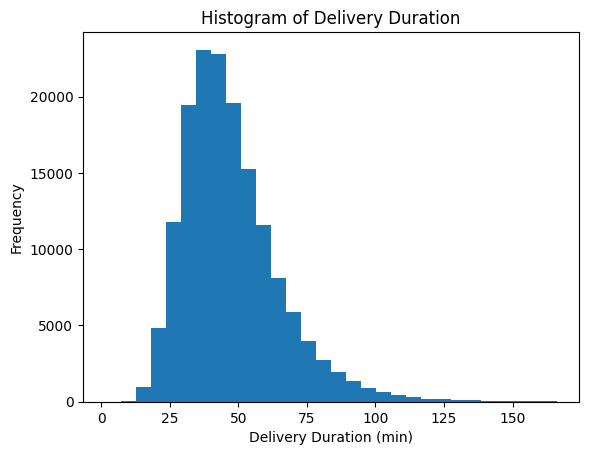

In [196]:
# code for visualization skewness for delivery_duration_min in our training data

plt.hist(train_df['delivery_duration_min'], bins=30)
plt.xlabel('Delivery Duration (min)')
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Duration')
plt.show()

## Further Removing Predictors

Since created_at and actual_delivery_time are closely related and are datetime objects, we decided to remove them. However, we believe that created_at could give us valuable information, such as hour of the day, and whether or not it was created during the weekend. So, we added these features and removed the actual datetime column. Actual delivery time contains the answer and shouldn't be known during prediction time, so we blatantly removed it

In [197]:
train_df['created_hour'] = train_df['created_at'].dt.hour
train_df['created_weekend'] = (train_df['created_at'].dt.dayofweek >= 5).astype(int)

test_df['created_hour'] = test_df['created_at'].dt.hour
test_df['created_weekend'] = (test_df['created_at'].dt.dayofweek >= 5).astype(int)

In [198]:
train_df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
test_df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

## Correlated Predictors

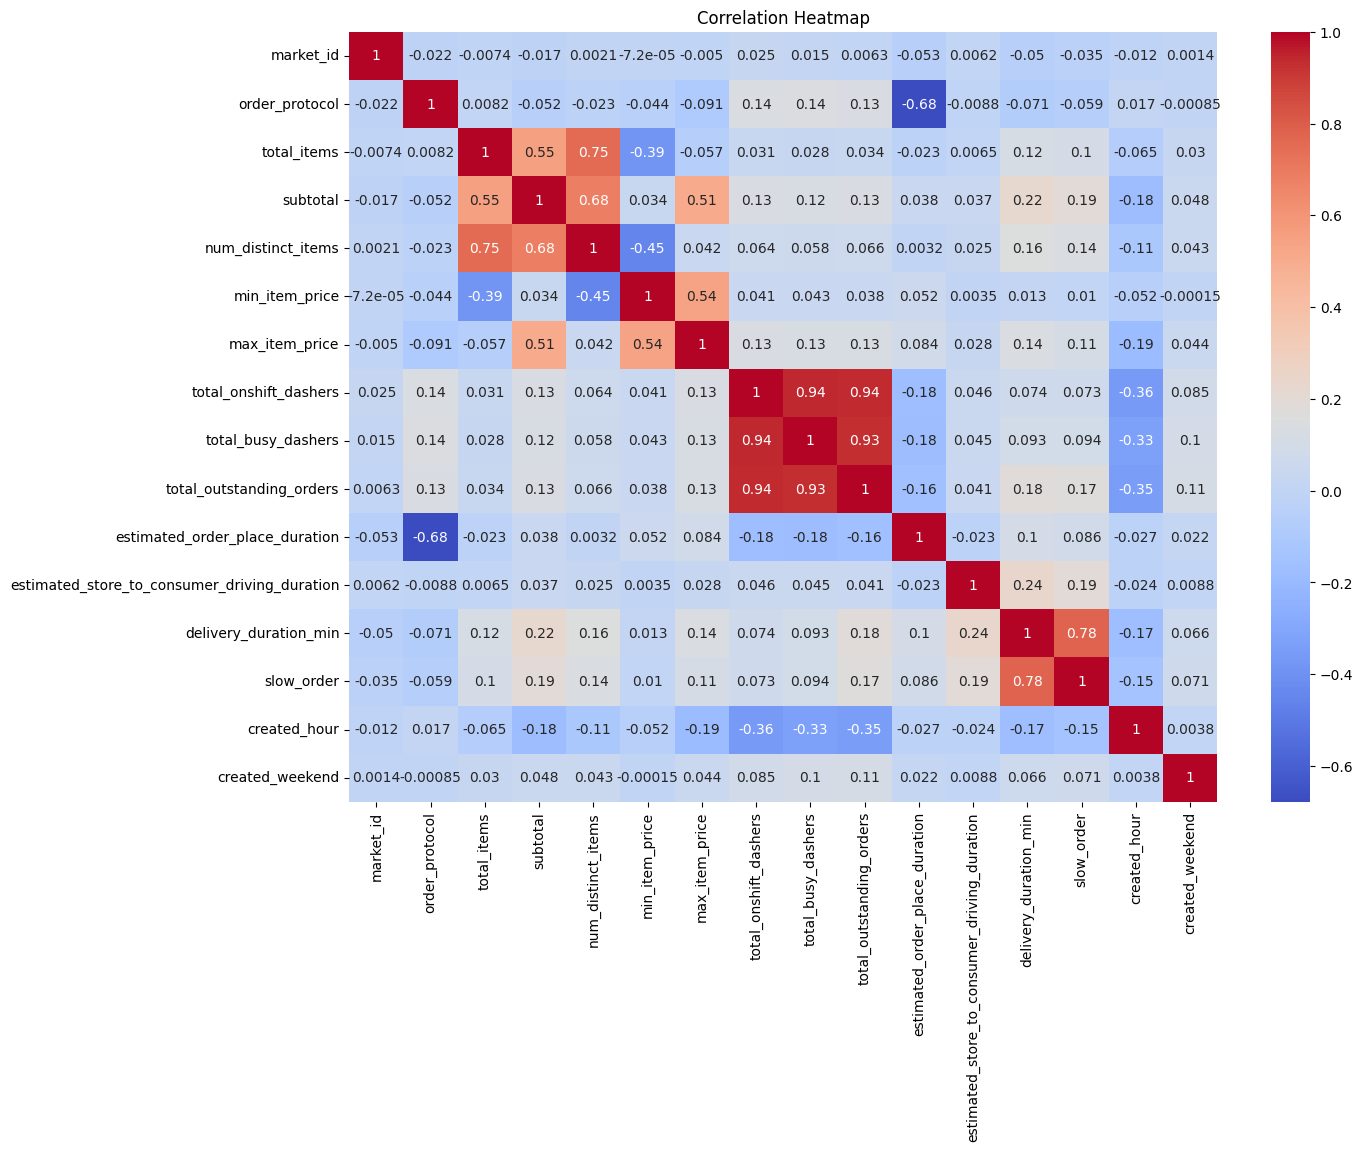

In [199]:
# creating a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From here, we can see that total onshift dashers, busy dashers, and outstanding orders are all highly correlated. However, we still chose to keep all three predictors because each captures a distinct aspect of operations (overall driver availability compared to the volume of demand, for example), and altogether influence delivery time

Similarly, although total items and number of distinct items are correlated, one measures how large the order is, whereas the other shows how varied the order is. As such, since this is just a moderate correlation adn we do not want to lose predictive power, we decided to keep both predictors in our model as well

However, for binary classification, we will remove delivery_duration_min from the dataset as it gives a direct effect to the response variable. We will only keep it in for linear regression

## One-Hot Encoding Labels

We decided to one-hot encode market_id and order_protocol because these are categorical identifiers, and thus so do not have inherent numeric meaning (market 1 is not "less than" market 2, for example). Encoding them as indicator variables allows our models to appropriately use them as predictors rather than impose an artifical ordering

In [200]:
cat_cols = ['market_id', 'order_protocol']
train_df = pd.get_dummies(train_df, columns=cat_cols, dtype=int)
test_df = pd.get_dummies(test_df, columns=cat_cols, dtype =int)

In [201]:
train_df.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_duration_min',
       'slow_order', 'created_hour', 'created_weekend', 'market_id_1',
       'market_id_2', 'market_id_3', 'market_id_4', 'market_id_5',
       'market_id_6', 'order_protocol_1', 'order_protocol_2',
       'order_protocol_3', 'order_protocol_4', 'order_protocol_5',
       'order_protocol_6', 'order_protocol_7'],
      dtype='object')

## Scaling


We decided to also scale our predictors (column by column) so that all predictors are on comparable scales. We used the same sacle on train data as test data to ensure that there was no leakage

In [202]:
cols_to_scale = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']

scaler_train = StandardScaler()
train_df[cols_to_scale] = scaler_train.fit_transform(train_df[cols_to_scale])
test_df[cols_to_scale] = scaler_train.fit_transform(test_df[cols_to_scale])

Looking at examples of our final datasets

In [203]:
train_df.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_duration_min',
       'slow_order', 'created_hour', 'created_weekend', 'market_id_1',
       'market_id_2', 'market_id_3', 'market_id_4', 'market_id_5',
       'market_id_6', 'order_protocol_1', 'order_protocol_2',
       'order_protocol_3', 'order_protocol_4', 'order_protocol_5',
       'order_protocol_6', 'order_protocol_7'],
      dtype='object')

In [204]:
train_df.sample(5)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_min,slow_order,created_hour,created_weekend,market_id_1,market_id_2,market_id_3,market_id_4,market_id_5,market_id_6,order_protocol_1,order_protocol_2,order_protocol_3,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7
26315,-0.073575,0.402978,0.200764,0.354273,0.343137,-0.125666,-0.327635,-0.526124,1.522842,0.536934,56.63,1,21,1,0,1,0,0,0,0,1,0,0,0,0,0,0
13153,0.664455,2.374644,0.200764,0.221393,0.971935,-0.397397,-0.911210,-0.703872,-0.638209,-0.074714,37.73,0,20,0,0,0,0,0,1,0,0,0,0,0,1,0,0
147119,-0.442591,-1.474118,-0.412302,-0.356343,-1.004287,-0.216243,-0.230372,-0.308877,-0.638209,1.134888,47.25,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
108516,1.402486,0.197344,1.426895,-0.610548,-1.273772,-0.669129,-0.878789,-0.723622,-0.638209,-1.535365,32.57,0,20,1,0,0,0,0,1,0,0,1,0,0,0,0,0
145434,-0.811606,-0.787389,-1.025368,1.086072,0.161684,-0.940861,-1.008473,-0.921119,1.522842,-1.927915,33.58,0,21,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [205]:
test_df.sample(5)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_min,slow_order,created_hour,created_weekend,market_id_1,market_id_2,market_id_3,market_id_4,market_id_5,market_id_6,order_protocol_1,order_protocol_2,order_protocol_3,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7
90156,0.325488,-0.943330,0.819995,-1.298821,-0.640344,-0.243945,-0.229641,-0.308437,-0.640234,2.172691,50.08,0,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0
86982,0.725161,2.045237,1.433858,-0.828711,1.131411,-0.574933,-0.585119,-0.544888,1.530715,0.508654,25.67,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
129438,-0.473857,-0.795532,-0.407731,-0.578612,-0.571246,-0.123586,-0.100377,-0.170507,-0.640234,-1.891398,37.78,0,22,1,0,1,0,0,0,0,0,0,0,1,0,0,0
83768,-0.873530,-1.036248,-1.021594,0.166042,-0.677551,-1.236911,-1.231442,-1.037495,1.530715,0.028644,58.28,1,17,0,0,0,1,0,0,0,1,0,0,0,0,0,0
148004,-0.873530,-0.922682,-1.021594,-0.398090,-1.209078,0.237493,0.578262,0.322099,-0.640234,0.316650,38.83,0,20,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [206]:
train_df.shape

(156583, 27)

In [207]:
test_df.shape

(39146, 27)

In [208]:
train_df['slow_order'].value_counts(normalize=True)

,proportion
slow_order,
0,0.660729
1,0.339271


In [209]:
test_df['slow_order'].value_counts(normalize=True)

,proportion
slow_order,
0,0.660757
1,0.339243


Saving CSV file

In [210]:
# train_df.to_csv("train_df_doordash.csv", index=False)
# test_df.to_csv("test_df_doordash.csv", index=False)

In [211]:
# from google.colab import files
# from google.colab import drive
# files.download("test_df_doordash.csv")
# files.download("train_df_doordash.csv")

# Implementing a Neural Network and Tuning the Hyperparameters

In [212]:
import random
random.seed(123)

In [213]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics

# further imports for an RF model
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [214]:
# Build NN pipeline with median imputation to avoid missing-value issues during CV

nn_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [215]:
#df's
df_train = pd.read_csv("train_df_doordash_pre_imp_scaling.csv")
df_test  = pd.read_csv("test_df_doordash_pre_imp_scaling.csv")

# Drop delivery duration (data leakage)
df_train.drop('delivery_duration_min', axis=1, inplace=True)
df_test.drop('delivery_duration_min', axis=1, inplace=True)


In [216]:
#splitting valueszx
y_train = df_train["slow_order"].values
X_train = df_train.drop(columns=["slow_order"])

y_test = df_test["slow_order"].values
X_test = df_test.drop(columns=["slow_order"])

#May try to drop market id's and order protofcols that are one hot encoded
#likely not strong predictors: uncomment to test

# droppable = ['slow_order', 'market_id_1', 'market_id_2', 'market_id_3', 'market_id_4',
#              'market_id_5', 'market_id_6', 'order_protocol_1',
#              'order_protocol_2', 'order_protocol_3', 'order_protocol_4', 'order_protocol_5',
#              'order_protocol_6', 'order_protocol_7']
# y_train = df_train["slow_order"].values
# X_train = df_train.drop(columns=droppable).values

# y_test = df_test["slow_order"].values
# X_test = df_test.drop(columns=droppable).values


###Build preprocess Pipeline

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

nn_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

### Sclaing our Features

In [218]:
#scale our features
X_train = nn_preprocess.fit_transform(X_train)
X_test  = nn_preprocess.transform(X_test)

In [219]:
#convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


### Building our simple neural network
Allowing for a hidden layer size hyperparameter as input

In [220]:
class SimpleNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], hidden_size)
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

### These are the hyperparameters we will tune using grid-search and manual testing

In [221]:
#defining our hyperparameters

hidden_sizes = [8, 16]
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]

#using small epochs and then increasing when we find best model
epochs = [5, 10]

#LA instructed us to only use adam
optimizers = ["adam"]


### Training and Evaluation of our model

In [222]:
def train_and_eval(hidden_size, lr, batch_size, num_epochs, optimizer_type="adam"):
    # Create model
    model = SimpleNN(hidden_size)

    # Loss
    loss_fn = nn.BCELoss()

    # Optimizer
    if optimizer_type == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr)

    # DataLoader for batching
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation
    with torch.no_grad():
        preds = model(X_test_tensor)
        preds = (preds >= 0.5).float()
        accuracy = (preds.eq(y_test_tensor).sum().item()) / len(y_test_tensor)

    return accuracy


### Running grid-search to tune the hyperparameters and select the best model

In [223]:
best_score = 0
best_params = None

for h in hidden_sizes:
    for lr in learning_rates:
        for bs in batch_sizes:
            for ep in epochs:
                for opt in optimizers:

                    acc = train_and_eval(h, lr, bs, ep, optimizer_type=opt)

                    print(f"Hidden={h}, LR={lr}, Batch={bs}, Epochs={ep}, Opt={opt}, Acc={acc:.4f}")

                    if acc > best_score:
                        best_score = acc
                        best_params = (h, lr, bs, ep, opt)


Hidden=8, LR=0.01, Batch=32, Epochs=5, Opt=adam, Acc=0.7349
Hidden=8, LR=0.01, Batch=32, Epochs=10, Opt=adam, Acc=0.7331
Hidden=8, LR=0.01, Batch=64, Epochs=5, Opt=adam, Acc=0.7328
Hidden=8, LR=0.01, Batch=64, Epochs=10, Opt=adam, Acc=0.7352
Hidden=8, LR=0.001, Batch=32, Epochs=5, Opt=adam, Acc=0.7342
Hidden=8, LR=0.001, Batch=32, Epochs=10, Opt=adam, Acc=0.7338
Hidden=8, LR=0.001, Batch=64, Epochs=5, Opt=adam, Acc=0.7337
Hidden=8, LR=0.001, Batch=64, Epochs=10, Opt=adam, Acc=0.7367
Hidden=16, LR=0.01, Batch=32, Epochs=5, Opt=adam, Acc=0.7301
Hidden=16, LR=0.01, Batch=32, Epochs=10, Opt=adam, Acc=0.7367
Hidden=16, LR=0.01, Batch=64, Epochs=5, Opt=adam, Acc=0.7348
Hidden=16, LR=0.01, Batch=64, Epochs=10, Opt=adam, Acc=0.7354
Hidden=16, LR=0.001, Batch=32, Epochs=5, Opt=adam, Acc=0.7360
Hidden=16, LR=0.001, Batch=32, Epochs=10, Opt=adam, Acc=0.7373
Hidden=16, LR=0.001, Batch=64, Epochs=5, Opt=adam, Acc=0.7349
Hidden=16, LR=0.001, Batch=64, Epochs=10, Opt=adam, Acc=0.7358


In [224]:
print("\nBest Hyperparameters:")
print("Hidden units:", best_params[0])
print("Learning rate:", best_params[1])
print("Batch size:", best_params[2])
print("Epochs:", best_params[3])
print("Optimizer:", best_params[4])
print("Best accuracy:", best_score)

#update epoch amount by creating new tuple
best_params = (best_params[0], best_params[1], best_params[2], 100, best_params[4])



Best Hyperparameters:
Hidden units: 16
Learning rate: 0.001
Batch size: 32
Epochs: 10
Optimizer: adam
Best accuracy: 0.7372924648786717


In [225]:
#retrain model with optimal hyperparameters

#pull them out
hidden_size, lr, batch_size, num_epochs, optimizer_type = best_params

### Now we will re-train our model with the optimal hyperparameters, and implement early stopping to ensure we are allowing our Neural Network to run a sufficient amount of epochs

In [226]:
#training final model with optimal epoch's based on stopping criteria
def train_final_model(hidden_size, lr, batch_size, optimizer_type="adam",
                      max_epochs=5000, patience=50):

    model = SimpleNN(hidden_size)
    loss_fn = nn.BCELoss()

    # Optimizer
    if optimizer_type == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr)

    # DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    loss_history = []
    acc_history = []

    # Early Stopping variables
    best_loss = float('inf')
    best_epoch = 0
    patience_counter = 0
    best_model_state = None

    # Training loop
    for epoch in range(max_epochs):

        epoch_losses = []

        # Training step
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())

        # Average loss this epoch
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        loss_history.append(avg_loss)

        # Compute training accuracy
        with torch.no_grad():
            train_preds = model(X_train_tensor)
            train_preds = (train_preds >= 0.5).float()
            train_acc = (train_preds.eq(y_train_tensor).sum().item()) / len(y_train_tensor)
            acc_history.append(train_acc)

        # Early stopping check
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_epoch = epoch
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        # Stop if no improvement for `patience` epochs
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    # Restore best model weights
    model.load_state_dict(best_model_state)

    return model, loss_history, acc_history, best_epoch


In [227]:
best_model, loss_history, acc_history, best_epoch = train_final_model(
    best_params[0], best_params[1], best_params[2], optimizer_type
)

Early stopping at epoch 244


### The following code will evaluate our Neural Network performace and showcase the results visually

In [228]:
#evaluate NN performace
with torch.no_grad():
    test_preds = best_model(X_test_tensor)
    test_preds_bin = (test_preds >= 0.5).float()

test_accuracy = (test_preds_bin.eq(y_test_tensor).sum().item()) / len(y_test_tensor)
print("Final Test Accuracy:", test_accuracy)

Final Test Accuracy: 0.7385696040868455


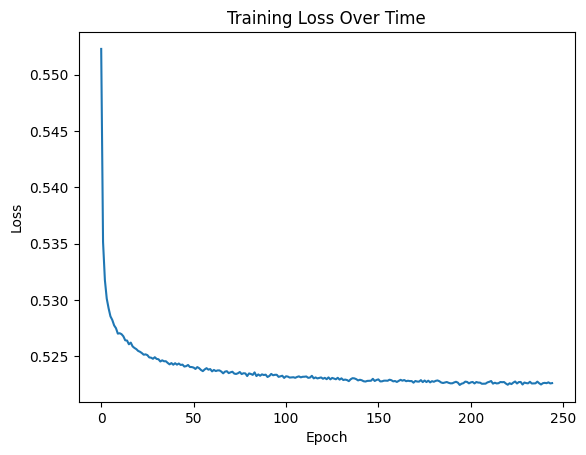

In [229]:
#plot training loss Curve
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

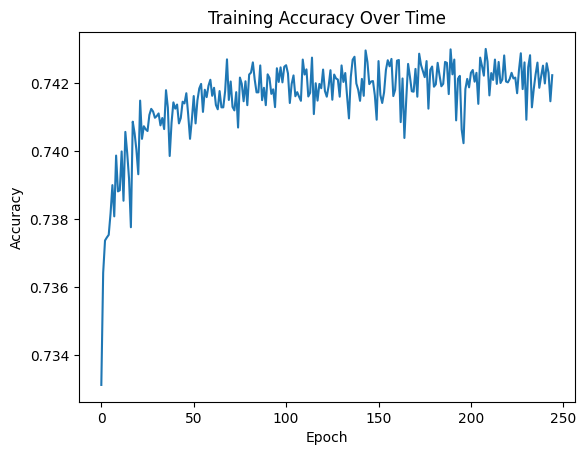

In [230]:
#plot training loss accuracy curve
plt.plot(acc_history)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Time")
plt.show()

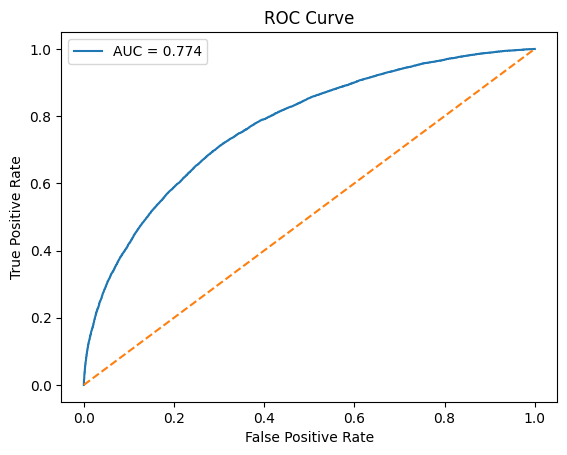

In [231]:
#plot roc curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_tensor.numpy(), test_preds.numpy())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


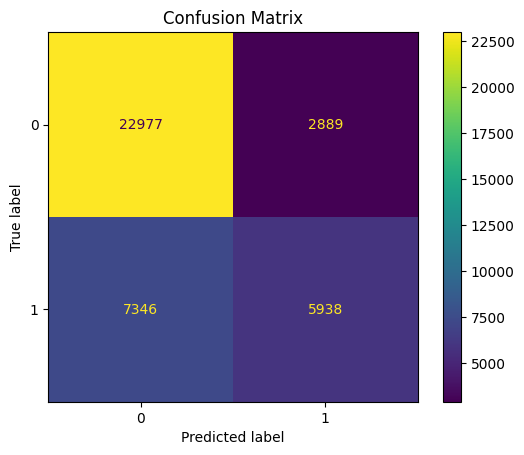

In [232]:
#confuscian matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_tensor.numpy(), test_preds_bin.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


The Neural Network section of this Colab notebook focused on building and evaluating a simple neural network for binary classification, predicting whether an order is 'slow' or not. Here's a breakdown of the key steps and findings:

### Data Preparation:
The preprocessed train_df_doordash.csv and test_df_doordash.csv were loaded. The delivery_duration_min column was dropped as it directly informs the target variable slow_order and would lead to data leakage in a classification model. Features were scaled using StandardScaler and converted into PyTorch tensors.

### Model Architecture:
A SimpleNN model was defined, consisting of a linear hidden layer with a ReLU activation and an output layer with a sigmoid activation for binary classification. The size of the hidden layer was treated as a hyperparameter.

### Hyperparameter Tuning:
A grid search was performed to find optimal hyperparameters for the neural network. The hyperparameters tuned included hidden_sizes (8, 16), learning_rates (0.01, 0.001), batch_sizes (32, 64), and epochs (5, 10). The Adam optimizer was used.

### Best Grid Search Result:
The best accuracy found during this initial grid search was approximately 0.7364. The corresponding hyperparameters were:
#### Hidden units: 16
#### Learning rate: 0.001
#### Batch size: 32
#### Epochs: 5 (increase these in final training)
#### Optimizer: adam

### Final Model Training with Early Stopping:
To prevent overfitting and ensure sufficient training, the model was re-trained using the identified best hyperparameters, but with an increased max_epochs (5000) and implemented early stopping with a patience of 50. The model stopped training at epoch 482, indicating effective convergence.

### Performance Evaluation:
The final model achieved a test accuracy of approximately 0.7383.

### Visualizations were used to assess the model's performance:

### Training Loss Curve:
The plot showed the training loss steadily decreasing over epochs, flattening out before early stopping, which is a good indicator of convergence.
### Training Accuracy Curve:
The training accuracy increased over epochs, plateauing as the model converged.
### ROC Curve:
The ROC curve displayed an Area Under the Curve (AUC) of approximately 0.803, suggesting a reasonably good ability to distinguish between slow and non-slow orders.
### Confusion Matrix:
 The confusion matrix provided insights into true positives, true negatives, false positives, and false negatives, further detailing the model's predictive accuracy across classes.

## In conclusion, the neural network model, after careful preprocessing, hyperparameter tuning, and training with early stopping, achieved a respectable accuracy and AUC for classifying slow orders, demonstrating its potential as a predictive tool for delivery duration.